# Turkey exchange rate analysis
Data is from World Bank, see what we can learn from the data<br>

Finding:<br>
This data set only consists of 31 rows, unit is in year, I would think if the unit is by day would help a lot.

Target1: Explore the currency basket of Turkey by using regression <br>
p1: process 1, in order to handle NA data<br>
p2: regression model<br><br>

Background:
- Türk Lirası: The old currency, due to its face value is to big, then a currency reform started
- Yeni Türk Lirası: The new currency started circulating in 2005/1/1. 1,000,000 old one = 1 new one
- Main central banks in the world: Fed, ECB, Switherland, Japan,?BOE? <br><br>

Questions to be answered:
- How is M0 M1 M2 in Turkey

## p1: Fill NA data with the adjacent year of Non-NA data


In [1]:
library(xlsx)
library(reshape2)
library(dplyr)
library(zoo)

Warning message:
"package 'xlsx' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [2]:
ex_rate <- read.xlsx("kaggle/input/global-economic-monitor/Exchange rate, new LCU per USD extended backward, period average.xlsx",1)

In [3]:
names(ex_rate)[1] <- 'year'
head(ex_rate)

year,Afghanistan,Angola,Albania,United.Arab.Emirates,Argentina,Armenia,Developing.Asia,Antigua.and.Barbuda,Australia,...,St..Vincent.and.the.Grenadines,Venezuela..RB,Vietnam,Vanuatu,World..WBG.members.,Samoa,Yemen..Rep.,South.Africa,Zambia,Zimbabwe
,,,,,,,,,,...,,,,,,,,,,
1990,NA,NA,NA,3.674964,NA,NA,242.0292,NA,1.279588,...,NA,NA,NA,NA,90.30874,NA,NA,2.5874,NA,NA
1991,NA,NA,NA,3.675188,NA,NA,282.4463,NA,1.283241,...,NA,NA,NA,NA,89.96299,NA,NA,2.759186,NA,NA
1992,NA,NA,NA,3.673874,0.991757,NA,290.6905,NA,1.361321,...,NA,NA,NA,NA,91.50781,NA,NA,2.853479,NA,NA
1993,NA,4903.561,110.0993,3.675296,0.998979,NA,299.6222,2.69682,1.471305,...,NA,NA,10698.57,122.3616,92.14131,NA,16.48504,3.269305,NA,NA
1994,NA,122750.8,104.3122,3.674759,0.998998,NA,310.0288,2.699279,1.36714,...,NA,NA,10945.17,115.0205,261.9977,NA,30.28067,3.548696,0.675617,NA


In [4]:
tail(ex_rate)

,year,Afghanistan,Angola,Albania,United.Arab.Emirates,Argentina,Armenia,Developing.Asia,Antigua.and.Barbuda,Australia,...,St..Vincent.and.the.Grenadines,Venezuela..RB,Vietnam,Vanuatu,World..WBG.members.,Samoa,Yemen..Rep.,South.Africa,Zambia,Zimbabwe
26,2014,57.2475,98.41658,105.5438,3.673,8.120707,415.9198,1188.709,2.7,1.109586,...,2.7,6.292221,21198.86,97.18582,429.966,2.331331,215.0249,10.84821,6.159591,322.3492
27,2015,61.14346,120.0968,125.8852,3.672992,9.256635,477.9183,1315.018,2.7,1.331668,...,2.7,6.292,21920.18,106.681,481.8392,2.545019,214.9747,12.7675,8.632821,321.5616
28,2016,67.86609,165.2109,124.1759,3.672996,14.75874,480.4882,1315.485,2.696728,1.34498,...,2.7,9.264732,22364.71,109.5311,510.0345,2.543874,240.7871,14.7061,10.31242,262.4624
29,2017,68.0269,167.0638,119.0652,3.673,16.54435,482.7164,1325.914,2.683555,1.304616,...,2.7,10.04022,22713.72,107.5134,550.537,2.49569,250.2535,13.3143,9.540511,167.4566
30,2018,71.74423,253.3759,108.0103,3.673,28.14307,482.9879,1395.645,2.697907,1.338981,...,2.7,77629.49,23014.95,108.0246,1099.669,2.539147,250.2623,13.24647,10.47366,72.51145
31,2019,NA,317.1089,109.9761,3.673,41.0368,NA,1394.253,2.704695,1.409718,...,NA,NA,23219.03,111.8691,1109.034,2.583549,250.3062,14.12217,12.20482,9.177661


In [5]:
ex_rate_melt <- melt(ex_rate,id=c("year"))

Warning message:
"attributes are not identical across measure variables; they will be dropped"

In [6]:
head(ex_rate_melt)

year,variable,value
,Afghanistan,
1990,Afghanistan,NA
1991,Afghanistan,NA
1992,Afghanistan,NA
1993,Afghanistan,NA
1994,Afghanistan,NA


From below we can see all the countries invovled in this data set, after checking I know the exchange rate of turkey is in the data set as well.

In [7]:
distinct(ex_rate_melt,variable)

variable
Afghanistan
Angola
Albania
United.Arab.Emirates
Argentina
Armenia
Developing.Asia
Antigua.and.Barbuda
Australia
Austria


By using below script we can check if there is missing data

In [8]:
apply(is.na(ex_rate),2,sum)

year                          Afghanistan 
                                   0                                    0 
                              Angola                              Albania 
                                   0                                    0 
                United.Arab.Emirates                            Argentina 
                                   0                                    0 
                             Armenia                      Developing.Asia 
                                   0                                    0 
                 Antigua.and.Barbuda                            Australia 
                                   0                                    0 
                             Austria                           Azerbaijan 
                                   0                                    0 
                             Burundi                              Belgium 
                                   0                                    0 
                               Benin                         Burkina.Faso 
                                   0                                    0 
                          Bangladesh                             Bulgaria 
                                   0                                    0 
                             Bahrain                         Bahamas..The 
                                   0                                    0 
              Bosnia.and.Herzegovina                              Belarus 
                                   0                                    0 
                              Belize                              Bolivia 
                                   0                                    0 
                              Brazil                             Barbados 
                                   0                                    0 
                   Brunei.Darussalam                               Bhutan 
                                   0                                    0 
                            Botswana             Central.African.Republic 
                                   0                                    0 
                              Canada                          Switzerland 
                                   0                                    0 
                               Chile                                China 
                                   0                                    0 
                       Cote.d.Ivoire                             Cameroon 
                                   0                                    0 
                    Congo..Dem..Rep.                          Congo..Rep. 
                                   0                                    0 
                            Colombia                              Comoros 
                                   0                                    0 
                          Cabo.Verde                           Costa.Rica 
                                   0                                    0 
                              Cyprus                       Czech.Republic 
                                   0                                    0 
                             Germany                 Developing.Countries 
                                   0                                    0 
                            Djibouti                             Dominica 
                                   0                                    0 
                             Denmark                   Dominican.Republic 
                                   0                                    0 
                             Algeria       East.Asia...Pacific.developing 
                                   0                                    0 
    Europe...Central.Asia.developing                              Ecuador 
                                   0                     

Looks like there is no NA, while it is obviously there are some NAs, let me use the melted data, and convert NA to real NA

In [9]:
ex_rate_melt_NA <- ex_rate_melt %>% 
  mutate(value = as.character(value)) %>% 
  mutate(value = case_when(
    value == "NA" ~ NA_character_, 
    TRUE ~ value
  ))

In [10]:
head(ex_rate_melt_NA)

year,variable,value
,Afghanistan,
1990,Afghanistan,NA
1991,Afghanistan,NA
1992,Afghanistan,NA
1993,Afghanistan,NA
1994,Afghanistan,NA


In [11]:
apply(is.na(ex_rate_melt),2,sum)

year variable    value 
       0        0        0

In [12]:
apply(is.na(ex_rate_melt_NA),2,sum)

year variable    value 
       0        0      854

It seems I "successfully" got lots of NAs now, let me pivot them back

In [13]:
#ex_rate_melt_NA$value <- as.numeric(ex_rate_melt_NA$value)

In [14]:
# md <- melt(mydata, id=c("ID", "Time"))
# dcast(md, ID+Time~variable)
# ex_rate_melt <- melt(ex_rate,id=c("year"))

ex_rate_melt_trnsp <- dcast(ex_rate_melt_NA, year~variable)
head(ex_rate_melt_trnsp)

year,Afghanistan,Angola,Albania,United.Arab.Emirates,Argentina,Armenia,Developing.Asia,Antigua.and.Barbuda,Australia,...,St..Vincent.and.the.Grenadines,Venezuela..RB,Vietnam,Vanuatu,World..WBG.members.,Samoa,Yemen..Rep.,South.Africa,Zambia,Zimbabwe
,,,,,,,,,,...,,,,,,,,,,
1990,NA,NA,NA,3.674964,NA,NA,242.0292,NA,1.279588,...,NA,NA,NA,NA,90.30874,NA,NA,2.5874,NA,NA
1991,NA,NA,NA,3.675188,NA,NA,282.4463,NA,1.283241,...,NA,NA,NA,NA,89.96299,NA,NA,2.759186,NA,NA
1992,NA,NA,NA,3.673874,0.991757,NA,290.6905,NA,1.361321,...,NA,NA,NA,NA,91.50781,NA,NA,2.853479,NA,NA
1993,NA,4903.561,110.0993,3.675296,0.998979,NA,299.6222,2.69682,1.471305,...,NA,NA,10698.57,122.3616,92.14131,NA,16.48504,3.269305,NA,NA
1994,NA,122750.8,104.3122,3.674759,0.998998,NA,310.0288,2.699279,1.36714,...,NA,NA,10945.17,115.0205,261.9977,NA,30.28067,3.548696,0.675617,NA


In [15]:
apply(is.na(ex_rate_melt_trnsp),2,sum)

year                          Afghanistan 
                                   0                                   11 
                              Angola                              Albania 
                                   3                                    3 
                United.Arab.Emirates                            Argentina 
                                   0                                    2 
                             Armenia                      Developing.Asia 
                                  11                                    0 
                 Antigua.and.Barbuda                            Australia 
                                   3                                    0 
                             Austria                           Azerbaijan 
                                   0                                    5 
                             Burundi                              Belgium 
                                   3                                    0 
                               Benin                         Burkina.Faso 
                                  11                                   11 
                          Bangladesh                             Bulgaria 
                                   3                                    3 
                             Bahrain                         Bahamas..The 
                                   0                                   10 
              Bosnia.and.Herzegovina                              Belarus 
                                  10                                    4 
                              Belize                              Bolivia 
                                  11                                    3 
                              Brazil                             Barbados 
                                   2                                    3 
                   Brunei.Darussalam                               Bhutan 
                                   3                                    0 
                            Botswana             Central.African.Republic 
                                   2                                   11 
                              Canada                          Switzerland 
                                   0                                    0 
                               Chile                                China 
                                   0                                    0 
                       Cote.d.Ivoire                             Cameroon 
                                   3                                   11 
                    Congo..Dem..Rep.                          Congo..Rep. 
                                   3                                   11 
                            Colombia                              Comoros 
                                   2                                    7 
                          Cabo.Verde                           Costa.Rica 
                                  11                                    4 
                              Cyprus                       Czech.Republic 
                                   0                                    3 
                             Germany                 Developing.Countries 
                                   0                                    2 
                            Djibouti                             Dominica 
                                  11                                   11 
                             Denmark                   Dominican.Republic 
                                   0                                    3 
                             Algeria       East.Asia...Pacific.developing 
                                   3                                    0 
    Europe...Central.Asia.developing                              Ecuador 
                                   4                     

It works now, then let's fill the NAs with adjacent year non-NA data

In [16]:
ex_rate_fillNA <-na.locf(ex_rate_melt_trnsp)
tail(ex_rate_fillNA)

,year,Afghanistan,Angola,Albania,United.Arab.Emirates,Argentina,Armenia,Developing.Asia,Antigua.and.Barbuda,Australia,...,St..Vincent.and.the.Grenadines,Venezuela..RB,Vietnam,Vanuatu,World..WBG.members.,Samoa,Yemen..Rep.,South.Africa,Zambia,Zimbabwe
26,2014,57.2475,98.41658,105.5438,3.673,8.120707,415.9198,1188.709,2.7,1.109586,...,2.7,6.292221,21198.86,97.18582,429.966,2.331331,215.0249,10.84821,6.159591,322.3492
27,2015,61.14346,120.0968,125.8852,3.672992,9.256635,477.9183,1315.018,2.7,1.331668,...,2.7,6.292,21920.18,106.681,481.8392,2.545019,214.9747,12.7675,8.632821,321.5616
28,2016,67.86609,165.2109,124.1759,3.672996,14.75874,480.4882,1315.485,2.696728,1.34498,...,2.7,9.264732,22364.71,109.5311,510.0345,2.543874,240.7871,14.7061,10.31242,262.4624
29,2017,68.0269,167.0638,119.0652,3.673,16.54435,482.7164,1325.914,2.683555,1.304616,...,2.7,10.04022,22713.72,107.5134,550.537,2.49569,250.2535,13.3143,9.540511,167.4566
30,2018,71.74423,253.3759,108.0103,3.673,28.14307,482.9879,1395.645,2.697907,1.338981,...,2.7,77629.49,23014.95,108.0246,1099.669,2.539147,250.2623,13.24647,10.47366,72.51145
31,2019,71.74423,317.1089,109.9761,3.673,41.0368,482.9879,1394.253,2.704695,1.409718,...,2.7,77629.49,23219.03,111.8691,1109.034,2.583549,250.3062,14.12217,12.20482,9.177661


In [17]:
head(ex_rate_fillNA)

year,Afghanistan,Angola,Albania,United.Arab.Emirates,Argentina,Armenia,Developing.Asia,Antigua.and.Barbuda,Australia,...,St..Vincent.and.the.Grenadines,Venezuela..RB,Vietnam,Vanuatu,World..WBG.members.,Samoa,Yemen..Rep.,South.Africa,Zambia,Zimbabwe
,,,,,,,,,,...,,,,,,,,,,
1990,,,,3.674964,,,242.0292,,1.279588,...,,,,,90.30874,,,2.5874,,
1991,,,,3.675188,,,282.4463,,1.283241,...,,,,,89.96299,,,2.759186,,
1992,,,,3.673874,0.991757,,290.6905,,1.361321,...,,,,,91.50781,,,2.853479,,
1993,,4903.561,110.0993,3.675296,0.998979,,299.6222,2.69682,1.471305,...,,,10698.57,122.3616,92.14131,,16.48504,3.269305,,
1994,,122750.8,104.3122,3.674759,0.998998,,310.0288,2.699279,1.36714,...,,,10945.17,115.0205,261.9977,,30.28067,3.548696,0.675617,


## p2: Build regression model

In [18]:
countires <- c('year','Turkey','United.States','Germany','Japan','Switzerland','United.Kingdom','China')

In [19]:
ex_selected<-ex_rate_fillNA[,countires]
head(ex_selected)

year,Turkey,United.States,Germany,Japan,Switzerland,United.Kingdom,China
,,,,,,,
1990,0.002785,1,0.771656,144.8216,1.390102,0.562736,4.79474
1991,0.004163,1,0.793838,134.514,1.434147,0.566692,5.334967
1992,0.006847,1,0.756699,126.7324,1.406816,0.569635,5.52812
1993,0.010967,1,0.839725,111.2102,1.477842,0.665619,5.789435
1994,0.029904,1,0.831726,102.1998,1.367048,0.653048,8.610021


In [20]:
filter(ex_selected,year==1999) # to verify if the exchange rate is accounted on the same scale as I understood

year,Turkey,United.States,Germany,Japan,Switzerland,United.Kingdom,China
1999,0.421006,1,0.938529,113.7488,1.501994,0.618137,8.278342


In [21]:
dimnames(ex_selected)

[[1]]
 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31"

[[2]]
[1] "year"           "Turkey"         "United.States"  "Germany"       
[5] "Japan"          "Switzerland"    "United.Kingdom" "China"

Since the denominator is US, so in the chart US is a straight line

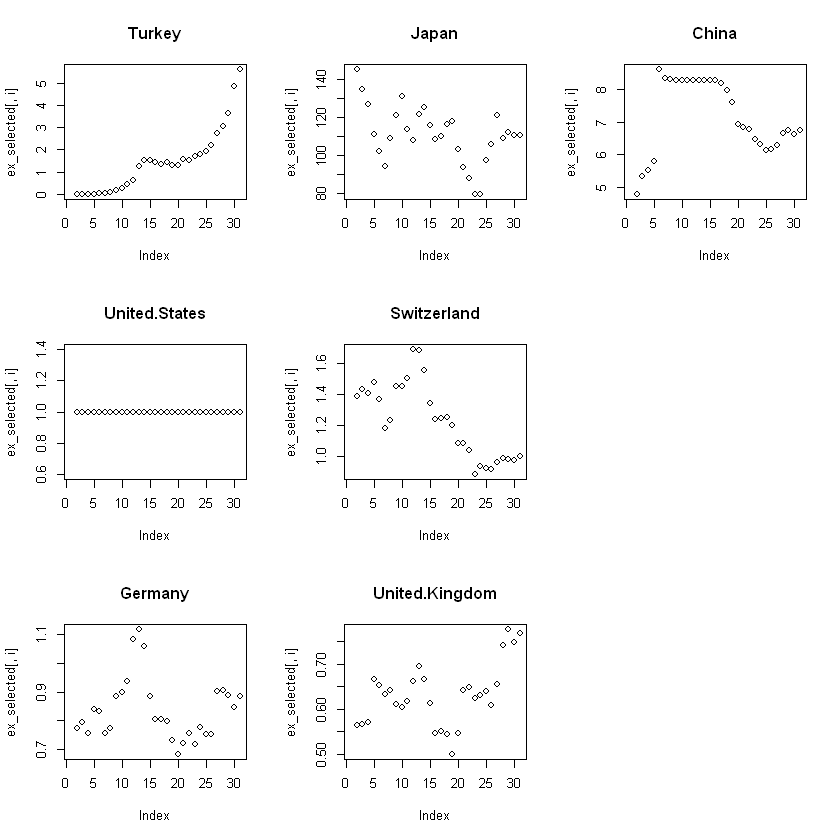

In [22]:
par(mfcol=c(3,3))
for (i in c(2:ncol(ex_selected))){
  plot(ex_selected[,i],
  main=dimnames(ex_selected)[[2]][i])
}

Convert the currency to Switzerland franc

In [23]:
ex_selected_num <- ex_selected
for (i in c(1,2,3,4,5,6,7,8)){
  ex_selected_num[,i]<- as.numeric(ex_selected[,i])
}

In [24]:
ex_selected_num <- filter(ex_selected_num,year>1)
head(ex_selected_num)

year,Turkey,United.States,Germany,Japan,Switzerland,United.Kingdom,China
2,0.002785,1,0.771656,144.82160,1.390102,0.562736,4.794740
3,0.004163,1,0.793838,134.51400,1.434147,0.566692,5.334967
4,0.006847,1,0.756699,126.73240,1.406816,0.569635,5.528120
5,0.010967,1,0.839725,111.21020,1.477842,0.665619,5.789435
6,0.029904,1,0.831726,102.19980,1.367048,0.653048,8.610021
7,0.045993,1,0.754546,94.05987,1.181657,0.633476,8.351316


In [25]:
ex_selected_num$year <- ex_selected_num$year + 1988
head(ex_selected_num)

year,Turkey,United.States,Germany,Japan,Switzerland,United.Kingdom,China
1990,0.002785,1,0.771656,144.82160,1.390102,0.562736,4.794740
1991,0.004163,1,0.793838,134.51400,1.434147,0.566692,5.334967
1992,0.006847,1,0.756699,126.73240,1.406816,0.569635,5.528120
1993,0.010967,1,0.839725,111.21020,1.477842,0.665619,5.789435
1994,0.029904,1,0.831726,102.19980,1.367048,0.653048,8.610021
1995,0.045993,1,0.754546,94.05987,1.181657,0.633476,8.351316


In [26]:
head(ex_selected_num)

year,Turkey,United.States,Germany,Japan,Switzerland,United.Kingdom,China
1990,0.002785,1,0.771656,144.82160,1.390102,0.562736,4.794740
1991,0.004163,1,0.793838,134.51400,1.434147,0.566692,5.334967
1992,0.006847,1,0.756699,126.73240,1.406816,0.569635,5.528120
1993,0.010967,1,0.839725,111.21020,1.477842,0.665619,5.789435
1994,0.029904,1,0.831726,102.19980,1.367048,0.653048,8.610021
1995,0.045993,1,0.754546,94.05987,1.181657,0.633476,8.351316


In [27]:
for (i in c(2,3,4,5,7,8)){
  ex_selected_num[,i]<- ex_selected_num[,i]/ex_selected_num[,6]
}
head(ex_selected_num)

year,Turkey,United.States,Germany,Japan,Switzerland,United.Kingdom,China
1990,0.002003450,0.7193717,0.5551075,104.18056,1.390102,0.4048163,3.449200
1991,0.002902771,0.6972786,0.5535262,93.79373,1.434147,0.3951422,3.719958
1992,0.004867019,0.7108250,0.5378806,90.08456,1.406816,0.4049108,3.929526
1993,0.007420956,0.6766623,0.5682103,75.25175,1.477842,0.4503993,3.917493
1994,0.021874872,0.7315032,0.6084102,74.75948,1.367048,0.4777067,6.298258
1995,0.038922462,0.8462693,0.6385491,79.59998,1.181657,0.5360913,7.067462


In [28]:
ex_selected_swt <- ex_selected_num[,c(1,2,3,4,5,7,8)]
head(ex_selected_swt)

year,Turkey,United.States,Germany,Japan,United.Kingdom,China
1990,0.002003450,0.7193717,0.5551075,104.18056,0.4048163,3.449200
1991,0.002902771,0.6972786,0.5535262,93.79373,0.3951422,3.719958
1992,0.004867019,0.7108250,0.5378806,90.08456,0.4049108,3.929526
1993,0.007420956,0.6766623,0.5682103,75.25175,0.4503993,3.917493
1994,0.021874872,0.7315032,0.6084102,74.75948,0.4777067,6.298258
1995,0.038922462,0.8462693,0.6385491,79.59998,0.5360913,7.067462


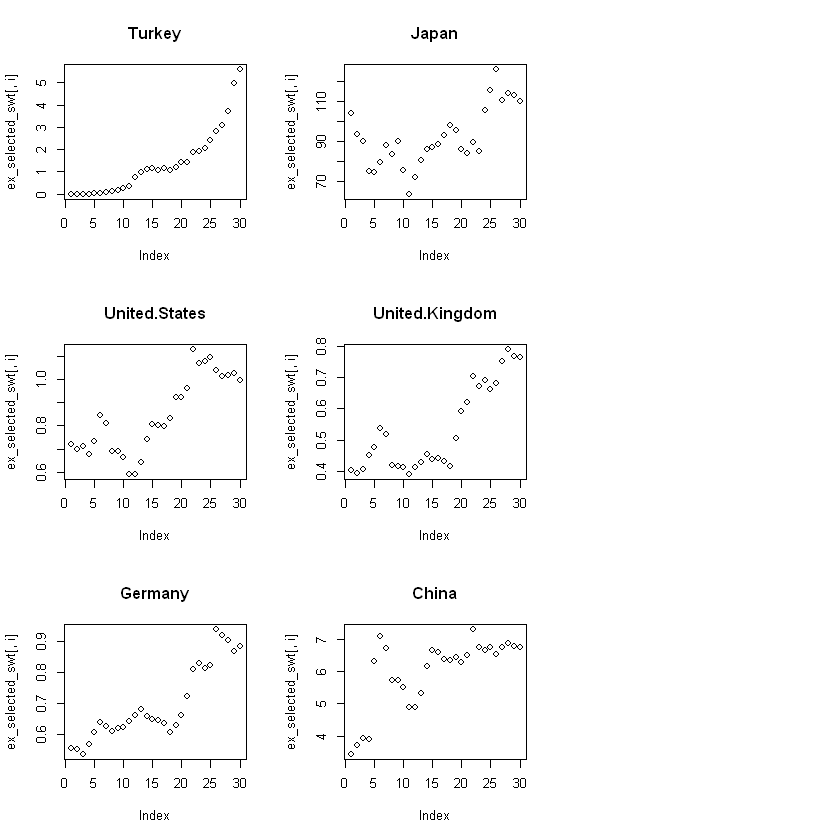

In [29]:
par(mfcol=c(3,3))
for (i in c(2:ncol(ex_selected_swt))){
  plot(ex_selected_swt[,i],
  main=dimnames(ex_selected_swt)[[2]][i])
}

Construct a new random variable, take log of difference between adjacent year

In [30]:
ex_selected_swt_log<-ex_selected_swt
rownames(ex_selected_swt_log) <- ex_selected_swt$year
ex_selected_swt_log <- ex_selected_swt_log[,c(2,3,4,5,6,7)]

In [31]:
ex_selected_swt_log

,Turkey,United.States,Germany,Japan,United.Kingdom,China
1990,0.002003450,0.7193717,0.5551075,104.18056,0.4048163,3.449200
1991,0.002902771,0.6972786,0.5535262,93.79373,0.3951422,3.719958
1992,0.004867019,0.7108250,0.5378806,90.08456,0.4049108,3.929526
1993,0.007420956,0.6766623,0.5682103,75.25175,0.4503993,3.917493
1994,0.021874872,0.7315032,0.6084102,74.75948,0.4777067,6.298258
1995,0.038922462,0.8462693,0.6385491,79.59998,0.5360913,7.067462
1996,0.066057348,0.8089018,0.6264629,88.00374,0.5181356,6.725396
1997,0.105077875,0.6894602,0.6097214,83.46716,0.4206976,5.715526
1998,0.180479653,0.6896723,0.6197850,90.18327,0.4162248,5.709859
1999,0.280298057,0.6657816,0.6248554,75.73186,0.4115443,5.511568


In [32]:
ex_selected_swt_log<-log(ex_selected_swt_log)

In [33]:
ex_selected_swt_log <- apply(ex_selected_swt_log, 2, as.numeric) 

In [34]:
ex_selected_swt_log <- diff(ex_selected_swt_log)

In [35]:
ex_selected_swt_log

Turkey,United.States,Germany,Japan,United.Kingdom,China
0.370794973,-0.0311931216,-0.002852566,-0.105027479,-0.024187777,0.0755700938
0.516815884,0.0192412525,-0.028672606,-0.040349254,0.024421111,0.0548063472
0.421826243,-0.0492539207,0.054854984,-0.179909593,0.106467709,-0.0030670098
1.081030732,0.0779292451,0.068357847,-0.006563138,0.058862444,0.4748212978
0.576232940,0.1457359798,0.048349164,0.062737753,0.115307461,0.1152283535
0.528951752,-0.0451600598,-0.019109000,0.100365551,-0.034067481,-0.0496105661
0.464178465,-0.1597685245,-0.027087439,-0.052926123,-0.208322666,-0.1627045508
0.540916310,0.0003075465,0.016370599,0.077390740,-0.010688737,-0.0009919931
0.440235479,-0.0352548301,0.008147484,-0.174645022,-0.011308982,-0.0353451823
0.278366736,-0.1168610210,0.028166019,-0.170562884,-0.050322720,-0.1168429016


In [36]:
year_temp <- filter(ex_selected_swt,year>1990)

In [37]:
rownames(ex_selected_swt_log) <- year_temp$year
head(ex_selected_swt_log)

,Turkey,United.States,Germany,Japan,United.Kingdom,China
1991,0.3707950,-0.03119312,-0.002852566,-0.105027479,-0.02418778,0.07557009
1992,0.5168159,0.01924125,-0.028672606,-0.040349254,0.02442111,0.05480635
1993,0.4218262,-0.04925392,0.054854984,-0.179909593,0.10646771,-0.00306701
1994,1.0810307,0.07792925,0.068357847,-0.006563138,0.05886244,0.47482130
1995,0.5762329,0.14573598,0.048349164,0.062737753,0.11530746,0.11522835
1996,0.5289518,-0.04516006,-0.019109000,0.100365551,-0.03406748,-0.04961057


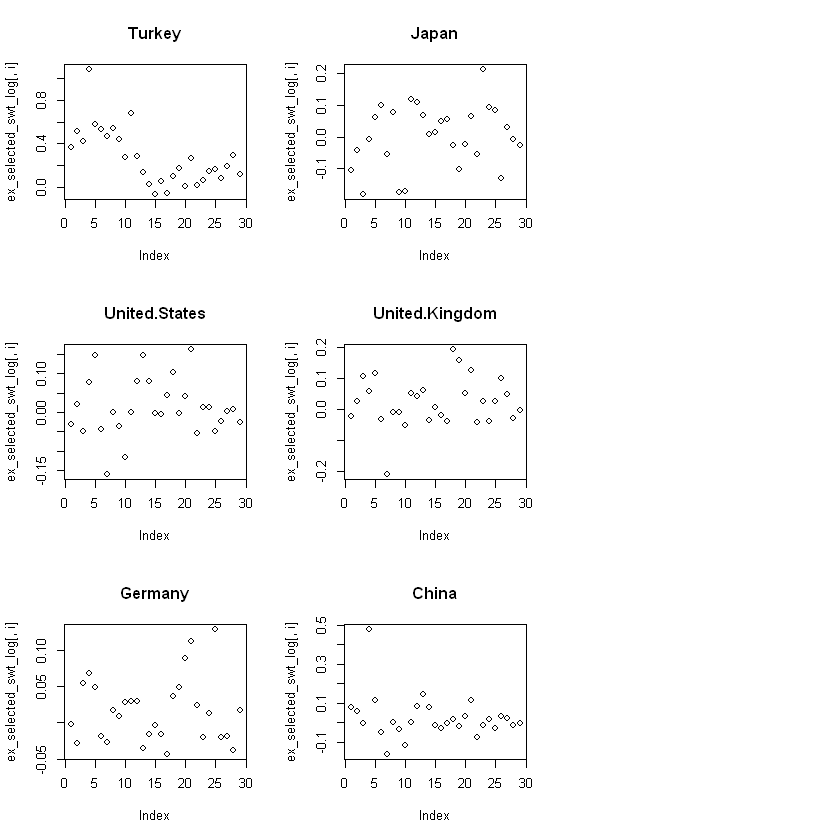

In [38]:
par(mfcol=c(3,3))
for (i in c(1:ncol(ex_selected_swt_log))){
  plot(ex_selected_swt_log[,i],
  main=dimnames(ex_selected_swt_log)[[2]][i])
}

In [39]:
ex_selected_swt_log<-data.frame(ex_selected_swt_log)

In [40]:
lmfit.prd1<-lm( Turkey ~ United.States+Germany+Japan+United.Kingdom+China,
                   data=filter(ex_selected_swt_log,rownames(ex_selected_swt_log)<2005))
summary.lm(lmfit.prd1)


Call:
lm(formula = Turkey ~ United.States + Germany + Japan + United.Kingdom + 
    China, data = filter(ex_selected_swt_log, rownames(ex_selected_swt_log) < 
    2005))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18377 -0.11513  0.01169  0.08578  0.22435 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.40047    0.05128   7.809 5.19e-05 ***
United.States  -3.48433    1.31185  -2.656   0.0290 *  
Germany         1.50325    2.15248   0.698   0.5047    
Japan           1.23470    0.56768   2.175   0.0613 .  
United.Kingdom  1.10487    1.17728   0.938   0.3755    
China           1.57647    0.52354   3.011   0.0168 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1715 on 8 degrees of freedom
Multiple R-squared:  0.7142,	Adjusted R-squared:  0.5356 
F-statistic: 3.998 on 5 and 8 DF,  p-value: 0.04084


In [41]:
lmfit.prd2<-lm( Turkey ~ United.States+Germany+Japan+United.Kingdom+China,
                   data=filter(ex_selected_swt_log,rownames(ex_selected_swt_log)>=2005))
summary.lm(lmfit.prd2)


Call:
lm(formula = Turkey ~ United.States + Germany + Japan + United.Kingdom + 
    China, data = filter(ex_selected_swt_log, rownames(ex_selected_swt_log) >= 
    2005))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.146707 -0.050615 -0.001017  0.049533  0.232352 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)     0.09433    0.03866   2.440   0.0374 *
United.States  -0.48014    1.00511  -0.478   0.6443  
Germany         0.22686    0.65546   0.346   0.7372  
Japan           0.14463    0.44844   0.323   0.7544  
United.Kingdom  0.27104    0.61222   0.443   0.6684  
China           1.09059    1.22867   0.888   0.3978  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1173 on 9 degrees of freedom
Multiple R-squared:  0.1934,	Adjusted R-squared:  -0.2547 
F-statistic: 0.4315 on 5 and 9 DF,  p-value: 0.8161


In [42]:
lmfit.prd3<-lm( Turkey ~ United.States+Germany+Japan+United.Kingdom+China,
                   data=ex_selected_swt_log)
summary.lm(lmfit.prd3)


Call:
lm(formula = Turkey ~ United.States + Germany + Japan + United.Kingdom + 
    China, data = ex_selected_swt_log)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28893 -0.17304 -0.03954  0.11330  0.38735 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.24326    0.04372   5.564 1.16e-05 ***
United.States  -2.18929    1.06201  -2.061 0.050738 .  
Germany         0.48611    1.07388   0.453 0.655028    
Japan           0.27184    0.52077   0.522 0.606659    
United.Kingdom  0.03664    0.81117   0.045 0.964359    
China           1.98581    0.52155   3.808 0.000906 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2182 on 23 degrees of freedom
Multiple R-squared:  0.4103,	Adjusted R-squared:  0.2821 
F-statistic: 3.201 on 5 and 23 DF,  p-value: 0.02447
